# Linear Regression for all the 3 stocks based on User selection.


The data taken here is a complete set with tweet info

In [1]:
import pandas_datareader as pdr
import pandas as pd 
import datetime
import pandas_ta

In [2]:
#!pip install pandas_ta

In [3]:
print ("Enter one of these values from doge / tesla/ twitter")
selected_value = input()

Enter one of these values from doge / tesla/ twitter
doge


In [4]:
# Database related all the code is moved to this file
%run -i "SqlConn.py"
#importing local py file
import SqlConn 

In [5]:
#Fetch Tweets and Sentiment data - Join from Tweet and Sentiment tables
try:
    df_Stock = SqlConn.fetchTweetSentimentForModelling(selected_value)
    print("Data transfer Done")
except BaseException as err:
    print(err)


Data transfer Done


In [6]:
selected_value

'doge'

In [7]:
df_Stock

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,sentimentScore,sentiment,id,adjustedClose,volume
0,1113009339743100929,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.8176,None,2205,57.175999,27394500
1,1113009339743100929,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.8176,None,4388,33.750000,11638000
2,1113009339743100929,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.8176,None,5723,0.002795,60298362
3,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893,16539,0.0000,None,2205,57.175999,27394500
4,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893,16539,0.0000,None,4388,33.750000,11638000
...,...,...,...,...,...,...,...,...,...,...,...,...
180,1531699416490557440,doge,2022-05-31,You’re humble bro. Billy’s sense of humor &amp...,NaN,12204,1237,0.7430,None,6878,0.085865,672444588
181,1538406040374595585,doge,2022-06-19,I will keep supporting Dogecoin,NaN,396566,37467,0.4404,None,6897,0.060396,1166163984
182,1544743525585141761,doge,2022-07-06,Supporting Doge wherever possible,NaN,10646,2085,0.4404,None,3026,695.200012,23951200
183,1544743525585141761,doge,2022-07-06,Supporting Doge wherever possible,NaN,10646,2085,0.4404,None,5209,38.209999,4870300


In [8]:
df_Stock["date"] = pd.to_datetime(df_Stock["date"])
df_Stock.set_index("date", inplace=True)
df_Stock

,tweetID,financeType,fullText,replyCount,likesCount,retweetCount,sentimentScore,sentiment,id,adjustedClose,volume
date,,,,,,,,,,,
2019-04-02,1113009339743100929,doge,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.8176,None,2205,57.175999,27394500
2019-04-02,1113009339743100929,doge,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.8176,None,4388,33.750000,11638000
2019-04-02,1113009339743100929,doge,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.8176,None,5723,0.002795,60298362
2019-04-02,1113173498384441344,doge,Dogecoin rulz,1732.0,138893,16539,0.0000,None,2205,57.175999,27394500
2019-04-02,1113173498384441344,doge,Dogecoin rulz,1732.0,138893,16539,0.0000,None,4388,33.750000,11638000
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,1531699416490557440,doge,You’re humble bro. Billy’s sense of humor &amp...,NaN,12204,1237,0.7430,None,6878,0.085865,672444588
2022-06-19,1538406040374595585,doge,I will keep supporting Dogecoin,NaN,396566,37467,0.4404,None,6897,0.060396,1166163984
2022-07-06,1544743525585141761,doge,Supporting Doge wherever possible,NaN,10646,2085,0.4404,None,3026,695.200012,23951200


In [9]:
df_AdjustedClose = df_Stock[['adjustedClose','sentimentScore']]


In [10]:
df_AdjustedClose

,adjustedClose,sentimentScore
date,,
2019-04-02,57.175999,0.8176
2019-04-02,33.750000,0.8176
2019-04-02,0.002795,0.8176
2019-04-02,57.175999,0.0000
2019-04-02,33.750000,0.0000
...,...,...
2022-05-31,0.085865,0.7430
2022-06-19,0.060396,0.4404
2022-07-06,695.200012,0.4404


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2019-04-02 to 2022-07-06
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   adjustedClose   185 non-null    float64
 1   sentimentScore  185 non-null    float64
dtypes: float64(2)
memory usage: 4.3 KB
None


<AxesSubplot:xlabel='date'>

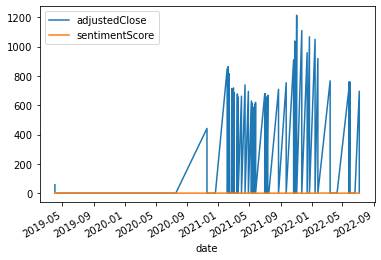

In [11]:
print(df_AdjustedClose.info())
df_AdjustedClose.plot()

In [12]:
# Add EMA to dataframe by appending
# Note: pandas_ta integrates seamlessly into
# our existing dataframe
df_AdjustedClose.ta.ema(close='adjustedClose', length=10, append=True)

C:\Users\15125\AppData\Local\Temp/ipykernel_21140/668832598.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AdjustedClose.ta.ema(close='adjustedClose', length=10, append=True)


date
2019-04-02           NaN
2019-04-02           NaN
2019-04-02           NaN
2019-04-02           NaN
2019-04-02           NaN
                 ...    
2022-05-31    215.102014
2022-06-19    176.003538
2022-07-06    270.402897
2022-07-06    228.186006
2022-07-06    186.710111
Name: EMA_10, Length: 185, dtype: float64

In [13]:
# Print the first 20 entries of our data
df_AdjustedClose.head(20)

,adjustedClose,sentimentScore,EMA_10
date,,,
2019-04-02,57.175999,0.8176,NaN
2019-04-02,33.750000,0.8176,NaN
2019-04-02,0.002795,0.8176,NaN
2019-04-02,57.175999,0.0000,NaN
2019-04-02,33.750000,0.0000,NaN
2019-04-02,0.002795,0.0000,NaN
2019-04-02,57.175999,0.3400,NaN
2019-04-02,33.750000,0.3400,NaN
2019-04-02,0.002795,0.3400,NaN


In [14]:
# Drop the first n-rows
df_AdjustedClose.dropna(inplace=True)
# View our newly-formed dataset
df_AdjustedClose.head(10)

C:\Users\15125\AppData\Local\Temp/ipykernel_21140/1199575657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AdjustedClose.dropna(inplace=True)


,adjustedClose,sentimentScore,EMA_10
date,,,
2020-04-25,0.002142,0.0000,27.278852
2020-07-18,0.003473,0.1511,22.319693
2020-11-17,441.609985,0.0000,98.554291
2020-11-17,42.849998,0.0000,88.426238
2020-11-17,0.002936,0.0000,72.349274
2020-12-20,0.004625,0.0000,59.195701
2021-02-04,849.989990,0.0000,202.976481
2021-02-04,56.509998,0.0000,176.346211
2021-02-04,0.053289,0.0000,144.292953


<AxesSubplot:xlabel='date'>

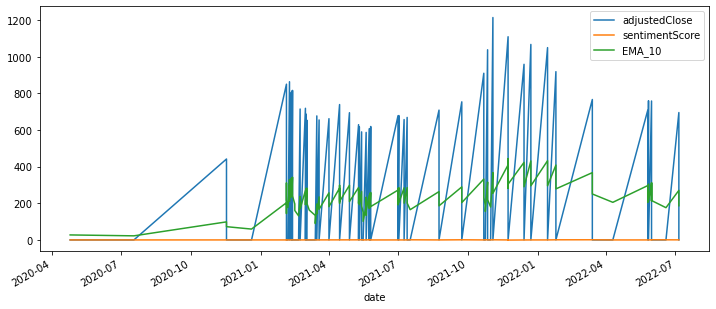

In [15]:
df_AdjustedClose.plot(figsize=(12,5))

In [16]:
 from sklearn.model_selection import train_test_split

In [17]:
# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(df_AdjustedClose[['adjustedClose']], df_AdjustedClose[['sentimentScore']], test_size=.2)
# Test set
print(X_test.describe())

       adjustedClose
count      36.000000
mean      159.795844
std       299.029478
min         0.002142
25%         0.059945
50%         0.283952
75%        59.607501
max       849.989990


In [18]:
# Training set
print(X_train.describe())

       adjustedClose
count     140.000000
mean      264.981099
std       362.682773
min         0.003473
25%         0.263371
50%        55.659999
75%       635.079987
max      1213.859985


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))


Model Coefficients: [[-4.60488489e-05]]
Mean Absolute Error: 0.32450795487571354
Coefficient of Determination: -0.10288164558081281


In [21]:
dfpred = pd.DataFrame(y_pred)
dfpred.columns=["y_pred"]
dfpred

,y_pred
0,0.110697
1,0.110697
2,0.110697
3,0.149836
4,0.115815
5,0.146702
6,0.121993
7,0.149836
8,0.149836
9,0.149836


In [22]:
y_test

,sentimentScore
date,
2021-02-04,0.0000
2021-02-04,0.0000
2021-02-04,-0.6369
2021-02-22,0.0000
2021-04-15,0.0000
2021-07-01,0.0000
2021-05-25,0.8834
2021-02-20,0.5106
2021-02-04,0.0000


In [23]:
df_trend = y_test.copy()
df_trend["y_pred"]=y_pred
df_trend

,sentimentScore,y_pred
date,,
2021-02-04,0.0000,0.110697
2021-02-04,0.0000,0.110697
2021-02-04,-0.6369,0.110697
2021-02-22,0.0000,0.149836
2021-04-15,0.0000,0.115815
2021-07-01,0.0000,0.146702
2021-05-25,0.8834,0.121993
2021-02-20,0.5106,0.149836
2021-02-04,0.0000,0.149836


<AxesSubplot:xlabel='date'>

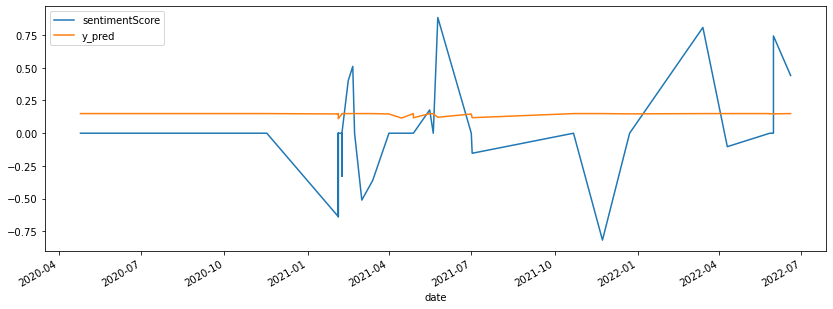

In [24]:
df_trend.plot(figsize=(14,5))
#That looks like whatever is the sentiment score the adjust value will not be impacted.

In [33]:
#Lets see the scaled values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_data_scaled = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df_trend)),columns=["sentimentScore","y_pred_adjustedClose"])

test_data_scaled.index = df_trend.index

<AxesSubplot:xlabel='date'>

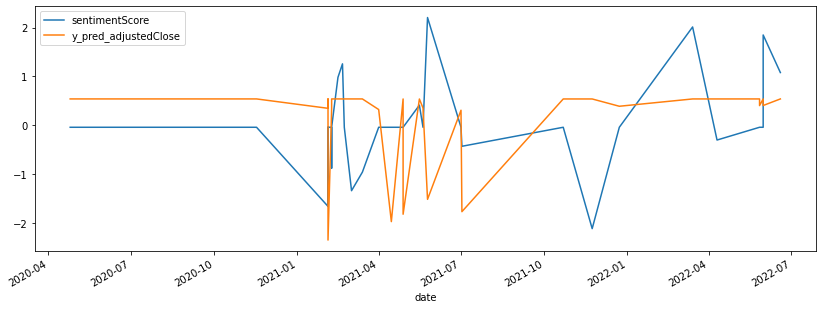

In [35]:
test_data_scaled.plot(figsize=(14,5)) #Scaled data 

In [40]:
test_data_scaled

,sentimentScore,y_pred_adjustedClose
date,,
2021-02-04,-0.036943,-2.340855
2021-02-04,-0.036943,-2.340855
2021-02-04,-1.652812,-2.340855
2021-02-22,-0.036943,0.541780
2021-04-15,-0.036943,-1.963914
2021-07-01,-0.036943,0.310961
2021-05-25,2.204317,-1.508898
2021-02-20,1.258492,0.541777
2021-02-04,-0.036943,0.541781


In [25]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0).fit(X_train, y_train)
print(model.score(X_train, y_train))

print(model.score(X_test, y_test))

0.7033535520000451
-0.1301621304331686


C:\Users\15125\AppData\Local\Temp/ipykernel_21140/3969865832.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(random_state=0).fit(X_train, y_train)


In [26]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,accuracy_score
# Printout relevant metrics
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
# print("Accuracy",accuracy_score(y_test,y_pred)) - not supported for continous data
# MAE 63 is very high difference between actual vs predicted - Loss is high - deviation from Actual is high
# COD 39% of the data fit the model

Mean Absolute Error: 0.32450795487571354
Coefficient of Determination: -0.10288164558081281


In [27]:
# Coefficient of Determination: 0.9925133513467957 close to 1, means the model is nearly perfectly fit
# Mean Absolute Error: 16.136803174699697 this value is high should be close to 0 for a best prediction
# Model Cofficients :[[0.99243097]] - X and Y are closely related -moving avergae does not have deviation from the actual values


In [28]:
predictions_reg = model.predict(X_test)
predictions_reg

array([-0.16763566, -0.16763566, -0.16763566,  0.025456  ,  0.25364733,
       -0.039196  ,  0.22119933,  0.070004  ,  0.003182  ,  0.        ,
        0.197352  ,  0.        , -0.210479  ,  0.02202   ,  0.4044388 ,
        0.0754055 , -0.0068688 ,  0.428903  ,  0.502784  ,  0.0715671 ,
        0.003182  ,  0.219558  , -0.05144493,  0.02202   ,  0.108792  ,
       -0.210479  ,  0.021807  ,  0.0754055 , -0.210479  ,  0.27105448,
        0.108792  ,  0.003182  , -0.210479  ,  0.3073068 ,  0.00587067,
       -0.030636  ])

In [29]:
dfpred_reg = pd.DataFrame(predictions_reg)
dfpred_reg.columns=["y_pred"]
dfpred_reg

,y_pred
0,-0.167636
1,-0.167636
2,-0.167636
3,0.025456
4,0.253647
5,-0.039196
6,0.221199
7,0.070004
8,0.003182
9,0.000000


In [30]:
df_reg = y_test.copy()
df_reg["y_pred"]=y_pred
df_reg

,sentimentScore,y_pred
date,,
2021-02-04,0.0000,0.110697
2021-02-04,0.0000,0.110697
2021-02-04,-0.6369,0.110697
2021-02-22,0.0000,0.149836
2021-04-15,0.0000,0.115815
2021-07-01,0.0000,0.146702
2021-05-25,0.8834,0.121993
2021-02-20,0.5106,0.149836
2021-02-04,0.0000,0.149836


<AxesSubplot:xlabel='date'>

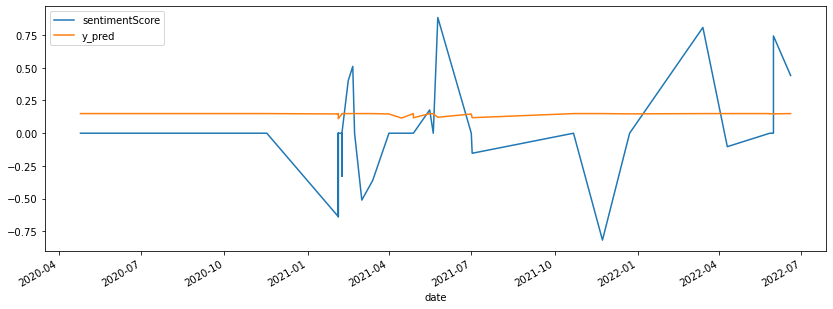

In [32]:
df_reg.plot(figsize=(14,5))

In [41]:
#Lets see the scaled values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_reg_scaled = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df_reg)),columns=["sentimentScore","y_pred_adjustedClose"])

df_reg_scaled.index = df_reg.index

<AxesSubplot:title={'center':'non Scaled Data'}, xlabel='date'>

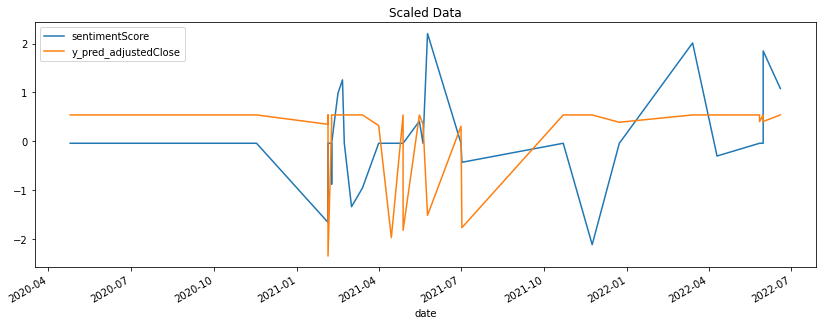

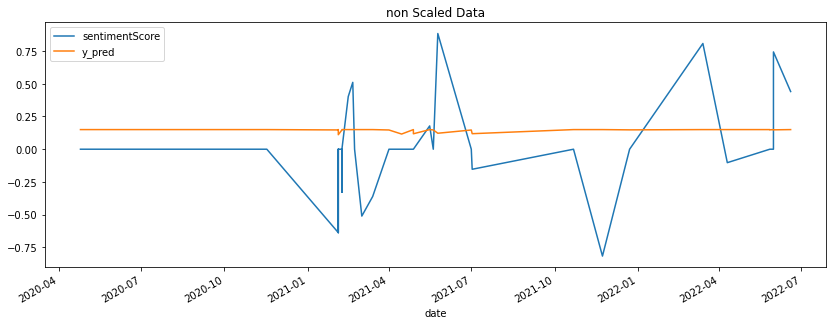

In [47]:
df_reg_scaled.plot(figsize=(14,5),title="Scaled Data")
df_reg.plot(figsize=(14,5), title="non Scaled Data")